In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install torchgeometry

!git clone https://github.com/sangyun884/HR-VITON.git

!mkdir -p ./HR-VITON/eval_models/weights/v0.1
!cp -r /kaggle/input/hr-viton/* ./HR-VITON/eval_models/weights/v0.1/

!mkdir -p /kaggle/working/data/test
!cp -r /kaggle/input/high-resolution-viton-zalando-dataset/test/* /kaggle/working/data/test


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 2.2 MB/s eta 0:00:00
Cloning into 'HR-VITON'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 135 (delta 43), reused 30 (delta 29), pack-reused 85
Receiving objects: 100% (135/135), 16.04 MiB | 40.56 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [3]:
import numpy as np
import pandas as pd

image = ["00017_00.jpg", "02660_00.jpg"]
clothes = ["13004_00.jpg", "14260_00.jpg"]
df = pd.DataFrame({"image": image, "clothes": clothes})
df.to_csv("/kaggle/working/data/pairs1.txt", index=False, header=False, sep=" ")

In [4]:
df

,image,clothes
0,00017_00.jpg,13004_00.jpg
1,02660_00.jpg,14260_00.jpg


In [5]:
!cd ./HR-VITON && python3 test_generator.py --occlusion --cuda {True} --gpu_ids {0} --dataroot /kaggle/working/data/ --data_list pairs1.txt --output_dir /kaggle/working/output/

Namespace(gpu_ids='0', workers=4, batch_size=1, fp16=False, cuda='True', test_name='test', dataroot='/kaggle/working/data/', datamode='test', data_list='pairs1.txt', output_dir='/kaggle/working/output/', datasetting='unpaired', fine_width=768, fine_height=1024, tensorboard_dir='./data/zalando-hd-resize/tensorboard', checkpoint_dir='checkpoints', tocg_checkpoint='./eval_models/weights/v0.1/mtviton.pth', gen_checkpoint='./eval_models/weights/v0.1/gen.pth', tensorboard_count=100, shuffle=False, semantic_nc=13, output_nc=13, gen_semantic_nc=7, warp_feature='T1', out_layer='relu', clothmask_composition='warp_grad', upsample='bilinear', occlusion=True, norm_G='spectralaliasinstance', ngf=64, init_type='xavier', init_variance=0.02, num_upsampling_layers='most')
Start to test %s!
Network [SPADEGenerator] was created. Total number of parameters: 100.5 million. To see the architecture, do print(network).
/kaggle/working/HR-VITON/test_generator.py:128: DeprecationWarning: `np.float` is a deprecat

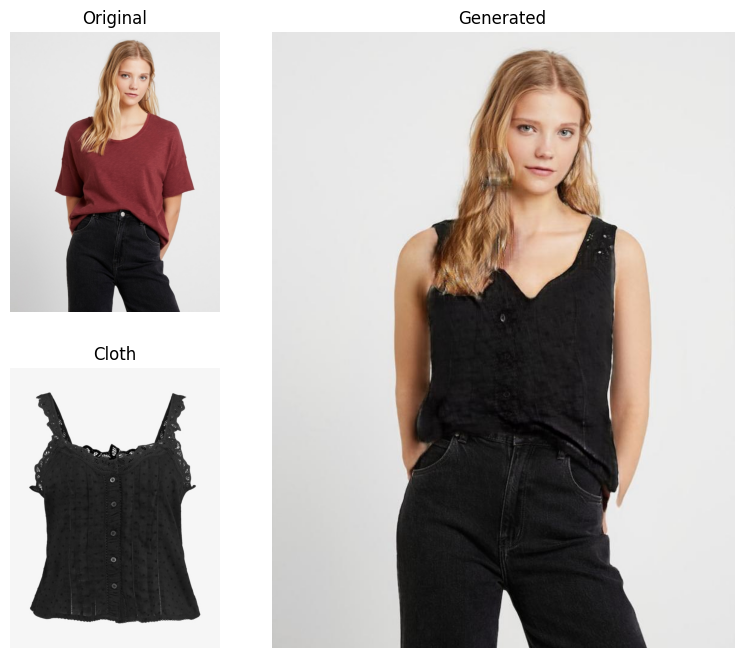

In [6]:

import matplotlib.pyplot as plt

idx = 0 #chỉ số ảnh tương ứng trong list image và list clothes 

img_ori = plt.imread(f"/kaggle/working/data/test/image/{image[idx]}")
cloth = plt.imread(f"/kaggle/working/data/test/cloth/{clothes[idx]}")
img_new = plt.imread(
    f"/kaggle/working/output/{image[idx][:-4]}_{clothes[idx][:-4]}.png", 0
)

plt.figure(figsize=(10, 8))
grid = plt.GridSpec(2, 3, wspace=0, hspace=0.2)

plt.subplot(grid[0, 0])
plt.imshow(img_ori)
plt.axis("off")
plt.title("Original")

plt.subplot(grid[1, 0])
plt.imshow(cloth)
plt.axis("off")
plt.title("Cloth")

plt.subplot(grid[:, 1:])
plt.imshow(img_new)
plt.axis("off")
plt.title("Generated")

plt.show()